# Chapter 12 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Baseball payroll

In [3]:
baseball = pd.read_csv("baseball_payroll.csv")
baseball.head()

,Team Name,Average Payroll (Million),Total Wins
0,Yankees,216.10,279
1,Red Sox,146.66,276
2,Mets,127.40,273
3,Dodgers,119.57,254
4,Cubs,115.16,248


 Visualize the dataset

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


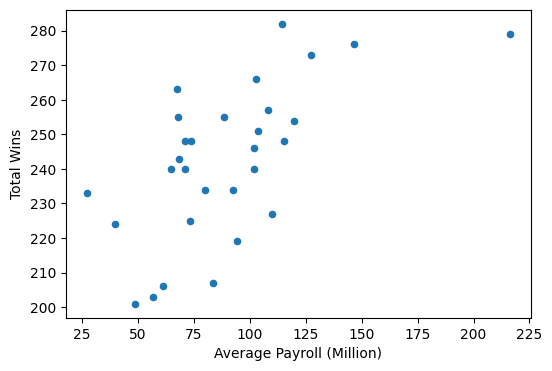

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="Total Wins", ax=ax)

ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

 Visualize the dataset

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


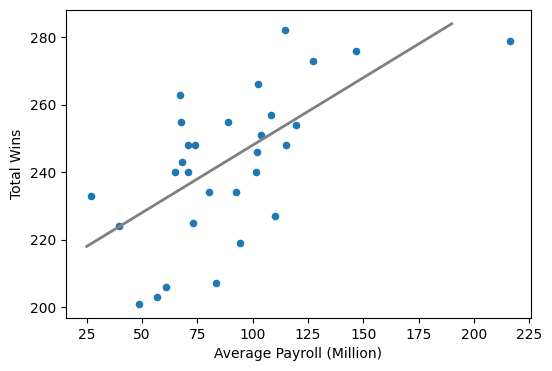

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="Total Wins", ax=ax)

x = np.array([25, 190])
ax.plot(x, 0.4 * x + 208, color="grey", linewidth=2)

ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

# Example: delta-wire linear regression

 Load the data

In [6]:
delta_wire = pd.DataFrame({
    "training": [0, 100, 250, 375, 525, 750, 875, 1100, 1300, 1450, 1660, 1900, 2300, 2600,
                2850, 3150, 3500, 4000],
    "productivity": [70_000, 70_350, 70_500, 72_600, 74_000, 76_500, 77_000, 77_400, 77_900,
                    77_200, 78_900, 81_000, 82_500, 84_000, 86_500, 87_000, 88_600, 90_000],
})

 Example: Delta Wire - Linear regression using scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(delta_wire[["training"]], delta_wire["productivity"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 70880.25
Slope: 5.093445


 Visualize the regression line

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


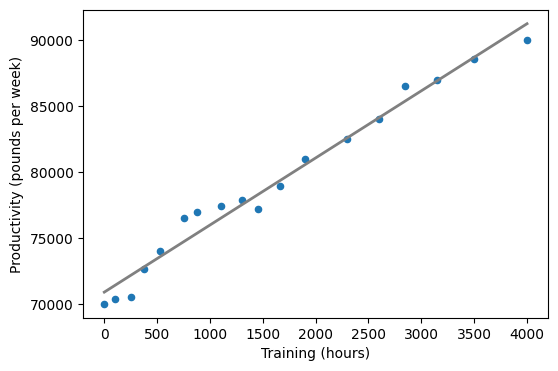

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
delta_wire.plot.scatter(x="training", y="productivity", ax=ax)
x = np.array([0, 4000])
ax.plot(x, model.predict(x.reshape(-1, 1)), color="grey", linewidth=2)
ax.set_xlabel("Training (hours)")
ax.set_ylabel("Productivity (pounds per week)")
plt.show()

 Example: PEFR - Linear regression using scikit-learn

In [9]:
pefr = pd.read_csv("pefr.txt", sep="\t")
model = LinearRegression()
model.fit(pefr[["exposure"]], pefr["pefr"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 424.58
Slope: -4.184576


 Visualize the regression line

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


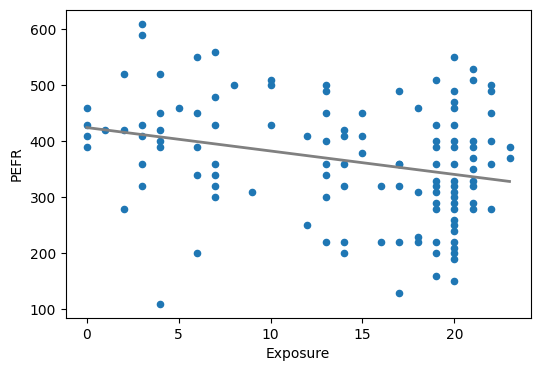

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
pefr.plot.scatter(x="exposure", y="pefr", ax=ax)
ax.set_xlabel("Exposure")
ax.set_ylabel("PEFR")
x = np.array([0, 23])
ax.plot(x, model.predict(x.reshape(-1, 1)), color="grey", linewidth=2)
plt.show()

# Residual plots - Baseball payroll dataset

 Calculate the residuals

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(baseball[["Average Payroll (Million)"]], baseball["Total Wins"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

baseball["residuals"] = baseball["Total Wins"] - model.predict(baseball[["Average Payroll (Million)"]])

Intercept: 207.48
Slope: 0.390470


 Visualize the residuals

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


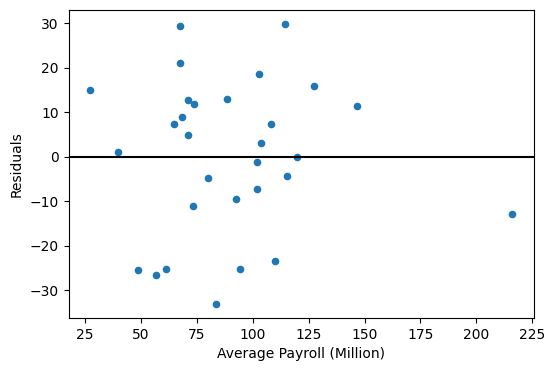

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Residuals")
plt.show()

# Residual plots - Delta Wire dataset

 Calculate the residuals

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(delta_wire[["training"]], delta_wire["productivity"])
delta_wire["residuals"] = delta_wire["productivity"] - model.predict(delta_wire[["training"]])

 Visualize the residuals

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


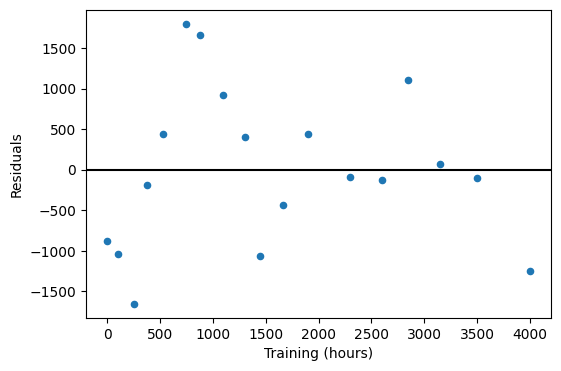

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
delta_wire.plot.scatter(x="training", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Training (hours)")
ax.set_ylabel("Residuals")
plt.show()

# Residual plots - PEFR dataset

 Calculate the residuals

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(pefr[["exposure"]], pefr["pefr"])
pefr["residuals"] = pefr["pefr"] - model.predict(pefr[["exposure"]])

 Visualize the residuals

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


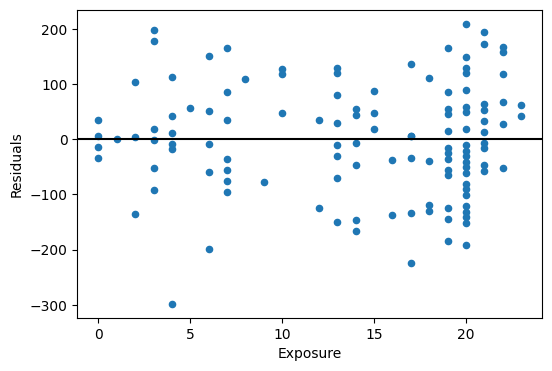

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
pefr.plot.scatter(x="exposure", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Exposure")
ax.set_ylabel("Residuals")
plt.show()